# Exercise 4

**_DISCLAIMER:_** The notation used in this exercise follows the one of the Probabilistic Robotics book (refer to Chapter 5.4 in case you have doubts).

## 4.1 Inverse motion model

The odometry model uses the _relative motion information_. The odometry readings are $u_t = [{\overline{x}}_{t-1} , {\overline{x}}_{t}]$, where $\overline{x}_{t-1}$ and  $\overline{x}_t$ are poses in a robot-internal coordinate frame (different from the map).

The function `inverse_motion_model` takes as input an odometry reading $u_t$ that consist in:

- the initial pose of the robot in the odometry coordinate frame $\overline{x}_{t-1} = [\overline{x},\overline{y},\overline{\theta}]$
- the estimated pose of the robot in the odometry coordinate frame $\overline{x}_t = [\overline{x}',\overline{y}',\overline{\theta}']$

The output is the relative motion $\delta_{rot1}, \delta_{trans}, \delta_{rot2}$.

Implement the function `inverse_motion_model` and verify that it is correct for some test input. **[2.0]**

In [1]:
from ex7 import *
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inv_motion_model([[0,0,0],[1,0,0]])

(0.0, 1.0, 0.0)

## 4.2 Odometry-based motion model

The function `motion_model_odometry` computes the posterior $p(x_t | u_t, x_{t-1})$ from odometry readings.

This function takes as input:

- the initial pose of the robot $x_{t-1} = [x,y,\theta]$ _(**map** coordinate frame)_
- the hypothesized (or query) final pose $x_{t} = [x', y', \theta']$ _(**map** coordinate frame)_
- the odometry readings $u_t = [\overline{x}_{t-1} \overline{x}_t]$ _(**odometry** coordinate frame)_
- the noise parameters $\mathbf{\alpha} = [\alpha_1, \alpha_2, \alpha_3, \alpha_4]$

The output is the probability $p(x_t | u_t, x_{t-1})$

Assume that a robot starts at pose $x_0 = [2.0, 3.0, 0.0]$ in the map frame and moves according to a motion model with $\mathbf{\alpha} = [1.0, 1.0, 0.01, 0.01]$.

The robot excecutes one motion command and the odometry readings are:

1. $\overline{x}_0 = [0.0 , 0.0 , 0.0   ]$
2. $\overline{x}_1 = [0.5 , 0.0 , \pi/2 ]$

Implement the `motion_model_odometry` function and verify that it is correct for some test input. **[1.0]**

---

Consider a 150x150 grid map the world with a resolution of 0.01, centered in the original position of the robot.

Plot the posterior $p(x_t | u_t, x_{t-1})$ for all possible $[x, y]$ values from the grid. **[2.0]**

**Note that** the query input is a position, not a pose. Therefore, to plot the posterior belief over the gridmap, you can assume the term $\hat{\delta}_\mathrm{rot2}$ to be zero and, for each position, integrate over all possible orientations. This can be implemented by considering $p_3 = 1.0$ in the equations. 

In [5]:
# Since we are using triangular normal distribution we get the following plot as the result 
# and at 1 it is at peak and hence we can verify it that motion model is correct

u = [[0.0,0.0,0.0],[1.0,0.0,0.0]]
x_0 = [0.0,0.0,0.0]
alpha = [1.0,1.0,0.01,0.01]
p = []
x = []
for i in range(50):
    if i<=25:

        query = [1-(0.01)*i,0.0,0.0]
        prob = motion_model_odometry(x_0, query, u, alpha, gridmap = True)
        p.append(prob)
        x.append(query[0])
    else:
        query = [1+(0.01)*(i-25),0.0,0.0]
        prob = motion_model_odometry(x_0, query, u, alpha, gridmap = True)
        p.append(prob)
        x.append(query[0])

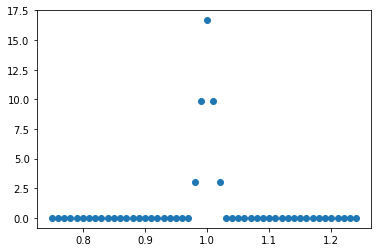

In [6]:
plt.scatter(x, p)
plt.show()

In [7]:
grid_map = np.zeros((150,150))
u_t      = [[0.0,0.0,0.0],[0.5,0.0,math.pi/2]]
x_init   = [2.0,3.0,0.0]
alpha    = [1.0,1.0,0.01,0.01]

for i in range(grid_map.shape[0]):
    for j in range(grid_map.shape[1]):
        grid_map[i][j] = motion_model_odometry(x_init, map2world(i, j, x_init,grid_map), u_t, alpha,gridmap = True)

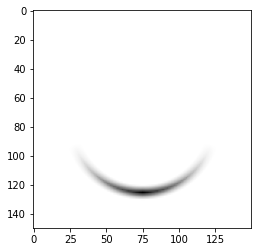

In [8]:
plot_gridmap(grid_map)

## 4.3 Sample odometry motion model

The `motion_model_odometry` requires high computation complexity and does not scale well to large real-world environments. 

One effective approach to approximate $p(x_t | u_t, x_{t-1})$ is to use **sampling**.

The `sample_motion_model_odometry` function defines the sampling-based odometry motion model. 

This function takes as input:

- the initial pose of the robot $x_{t-1} = [x,y,\theta]$ _(**map** coordinate frame)_
- the odometry readings $u_t = [\overline{x}_{t-1} \overline{x}_t]$ _(**odometry** coordinate frame)_
- the noise parameters $\mathbf{\alpha} = [\alpha_1, \alpha_2, \alpha_3, \alpha_4]$

The output is a new (sampled) pose predicted by the motion model.

Implement the `sample_motion_model_odometry` function and verify that it is correct for some test input. **[2.0]**

In [11]:
# Here when we sample 1000 times we get the value of x as the approximation of the distribution 
# we are using hence we can verify that sample motion_model_odometry is correct

x = np.array([0.0,0.0,0.0])
alpha = np.array([0.1,0.1,0.01,0.01])
u = np.array([[0.0,0.0,0.0],[1.0,0.0,0.0]])
x_n= []
for i in range(1000):
    x_new,y_new,z_new = sample_motion_model(x, u, alpha)
    x_n.append(x_new)
x_n = np.array(x_n)

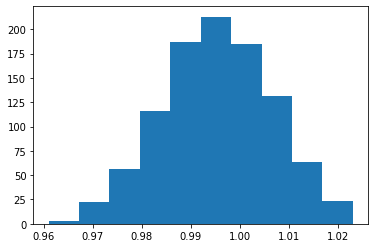

In [12]:
plt.hist(x_n)
plt.show()

## 4.4 Evaluate sample odometry motion model

Assume that a robot starts at pose $x_0 = [2.0, 3.0, 0.0]$ in the map frame and moves according to a motion model with $\mathbf{\alpha} = [0.1, 0.1, 0.01, 0.01]$.

The robot obtains the following odometry readings:

1. $\overline{x}_0 = [0.0 , 0.0 , 0.0   ]$
2. $\overline{x}_1 = [0.5 , 0.0 , \pi/2 ]$
3. $\overline{x}_2 = [0.5 , 0.5 , 0.0   ]$
4. $\overline{x}_3 = [1.0 , 0.5 , 0.0   ]$
5. $\overline{x}_4 = [1.0 , 1.5 , \pi/2 ]$
6. $\overline{x}_5 = [1.0 , 2.5 , \pi/2 ]$

Evaluate the `sample_motion_model_odometry` by considering 1000 samples and plot the resulting positions for each sample in one unique plot. **[3.0]**

In [13]:
commands = np.array([[0.0,0.0,0.0],[0.5,0.0,math.pi/2],[0.5,0.5,0.0],[1.0,0.5,0.0],[1.0,1.5,math.pi/2],[1.0,2.5,math.pi/2]])
alpha = np.array([0.1,0.1,0.01,0.01])
x_initials = np.array([0.0,0.0,0.0])
n_samples = 1000

samples = np.array([2.0,3.0,0.0]*1000).reshape((1000,3))

for i in range(1,len(commands)):
        
        x_init = np.array([2.0,3.0,0.0]) + np.array(commands[i-1])
        
        x_initials = np.vstack((x_initials,x_init))
        
        count = (i-1) * 1000
        
        u_t = np.array([commands[i-1], commands[i]])
      
        for j in range(1000):
                 
                 x_new,y_new,theta_new = sample_motion_model(samples[count + j],u_t,alpha)
                 pose = np.array([x_new,y_new,theta_new])
                 samples = np.vstack((samples,pose.T))
              

x_initials = np.vstack((x_initials,[3.0,5.5,0.0]))

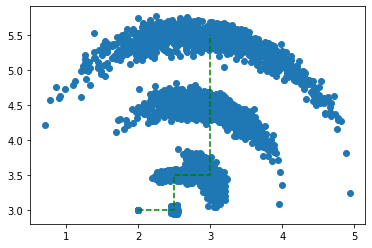

In [14]:
# Green line showing the true path the robot has taken if there is no noise

plt.plot(x_initials[1:,0], x_initials[1:,1], "--g")
plt.scatter(samples[:,0], samples[0:,1])
plt.show()